# <center><a href='https://colab.research.google.com/github/fortierq/itc1/blob/master/files/5_graph/3_traversal/traversal.ipynb'>Code : parcours de graphe <img src=https://colab.research.google.com/assets/colab-badge.svg width=100></a></center>

## Graphe de test

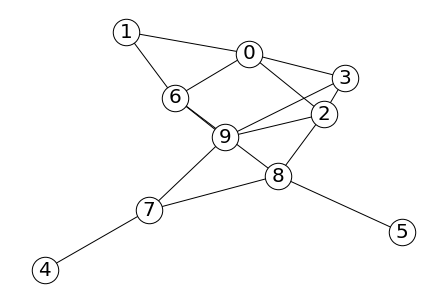

In [1]:
import networkx as nx

options = {"font_size": 20, "node_size": 700, "edgecolors": "black"}
G = nx.fast_gnp_random_graph(10, 0.35)
nx.draw(G, with_labels= True, node_color= "white", **options)


## Parcours en profondeur

### Avec fonction récursive

In [2]:
def dfs(G, s):
    visited = [False]*len(G)
    def aux(u):
        if not visited[u]:
            print(u, end=" ")
            visited[u] = True
            for v in G[u]:
                aux(v)
    aux(s)

dfs(G, 0) # affichage des sommets dans un ordre de parcours en profondeur

0 1 6 8 2 3 9 7 4 5 

### Avec pile

In [3]:
def dfs(G, s):
    visited = [False]*len(G)
    pile = [s]
    while len(pile) > 0:
        u = pile.pop()
        if not visited[u]:
            print(u, end=" ")
            visited[u] = True
            for v in G[u]:
                pile.append(v)

dfs(G, 0)

0 6 9 7 8 5 2 3 4 1 

## Parcours en largeur (BFS)

### Avec une file

In [4]:
from collections import deque

def bfs(G, s):
    visited = [False]*len(G)
    file = deque([s])
    while len(file) > 0:
        u = file.popleft()
        if not visited[u]:
            print(u, end=" ")
            visited[u] = True
            for v in G[u]:
                file.append(v)

bfs(G, 0)

0 1 2 3 6 8 9 5 7 4 

### Avec 2 couches

In [5]:
def bfs(G, s):
    visited = [False]*len(G)
    cur, next = [s], []
    while len(cur) + len(next) > 0: # on s'arrête quand les 2 sont vides
        if len(cur) == 0:
            cur, next = next, []
        u = cur.pop()
        if not visited[u]:
            visited[u] = True
            print(u, end=" ")
            for v in G[u]:
                next.append(v)

bfs(G, 0)

0 6 3 2 1 9 8 7 5 4 

### Application au calcul de distance

In [6]:
def distances(G, s):
    dist = [-1]*len(G)
    file = deque([(s, 0)])
    while len(file) > 0:
        u, d = file.popleft()
        if dist[u] == -1:
            dist[u] = d
            for v in G[u]:
                file.append((v, d + 1))
    return dist

distances(G, 0)

[0, 1, 1, 1, 4, 3, 1, 3, 2, 2]

### Application au calcul de plus court chemin

In [7]:
def bfs(G, s):
    pred = [-1]*len(G)
    file = deque([(s, s)])
    while len(file) > 0:
        u, p = file.popleft()
        if pred[u] == -1:
            pred[u] = p
            for v in G[u]:
                file.append((v, u))
    return pred

def path(pred, s, v):
    L = []
    while v != s:
        L.append(v)
        v = pred[v]
    L.append(s)
    return L[::-1] # inverse le chemin

pred = bfs(G, 0)
path(pred, 0, 8)

[0, 2, 8]


## Animation

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

def anim_traversal(G, traversal):
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i
    colors, widths = traversal(G)
    fig, ax = plt.subplots(figsize=(16,10))
    pos = nx.spring_layout(G)
    plt.close()
    def update(frame):
        ax.clear()
        nx.draw(G, pos, ax, width=widths[frame], node_color=colors[frame], **options)
    ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(colors), interval=800, repeat=True)
    return HTML(ani.to_jshtml())

## Parcours en profondeur

In [9]:
def dfs(G):
    colors, widths = ['black']*len(G), [1]*len(G.edges)
    frame_colors, frame_widths = [], []
    def add_frame():
        frame_colors.append(colors.copy())
        frame_widths.append(widths.copy())
    def aux(u):
        colors[u] = 'red'
        add_frame()
        for v in G.neighbors(u):
            if colors[v] == 'black':
                colors[u] = 'orange'
                widths[G[u][v]['index']] = 5
                aux(v)
                colors[u] = 'red'
                add_frame()
        colors[u] = 'green'
        add_frame()
    aux(0)
    return frame_colors, frame_widths

In [10]:
anim_traversal(G, dfs)

## Parcours en largeur

In [11]:
from collections import deque

def bfs(G):
    colors, widths = ['black']*len(G), [1]*len(G.edges)
    frame_colors, frame_widths = [], []
    def add_frame():
        frame_colors.append(colors.copy())
        frame_widths.append(widths.copy())
    q = deque([(0, -1)])
    while len(q) > 0:
        u, p = q.pop()
        if p != -1:
            widths[G[p][u]['index']] = 5
        colors[u] = 'green'
        add_frame()
        for v in G.neighbors(u):
            if colors[v] == 'black':
                colors[v] = 'orange'
                q.appendleft((v, u))
        add_frame()
    return frame_colors, frame_widths

In [12]:
G = nx.fast_gnp_random_graph(10, 0.35)
anim_traversal(G, bfs)